# L'Analyse des correspondances principales 


-----

## Introduction et présentation des objectifs du document 

<p style='text-align: justify;'>  
    Ce notebook est dédié à l'analyse en composantes principales (ACP ou PCA en anglais pour principal component analysis). Il doit permettre au lecteur de découvrir les avantages de Python pour la réalisation d'une ACP, de se familiariser avec la syntaxe de ce langage de programmation mais aussi de se pencher sur la théorie mathématique qui donne sens à l'ACP. En effet, il nous semble que pour analyser de la façon la plus juste qui soit les résultats d'une ACP, il est insuffisant de se former à la seule interprétation des données une fois traitées.   </p>


<p style='text-align: justify;'>  Faire l'effort de comprendre la théorie mathématique sur laquelle repose l'ACP peut permettre au chercheur en sciences sociales d'enrichir son interprétation et d'éviter des erreurs. Cependant, bien qu'il soit important que le praticien en sciences sociales ait une bonne maîtrise de son outil d'analyse, aborder la théorie mathématique de l'ACP sous un angle trop formel pourrait nous faire perdre de vue l'usage pratique de l'ACP en sciences sociales. </p>
<p style='text-align: justify;'> L'implémentation informatique des calculs mathématiques assure selon nous le lien entre théorie et pratique. Elle nous permet de ne pas céder à la tentation de faire une trop grande place à la théorie, et définit les limites de ce tutoriel, guidé par l’objectif pratique de coder un algorithme pour l’ACP. </p>


<p style='text-align: justify;'>Introduite par les travaux de Karl Pearson en 1901 et mise au point par Hotelling en 1933, cette méthode qui emprunte à la géométrie, à l'algèbre linéaire et à la statistique fait partie de la grande famille des analyses de données multivariées et plus précisément des analyses factorielles.</p>    

<p style='text-align: justify;'>Son principe est de traiter par le calcul un grand nombre de données quantitatives complexes et parfois redondantes afin de mettre en lumière la structuration de ces données. C'est donc un outil précieux aussi bien en sciences des données qu'en sciences humaines et sociales.  </p> 

**Concrètement**, face à un tableau de données (ici quantitatives) avec un nombre de colonnes et un nombre de lignes importants (a minima supérieurs à trois), l’ACP permet de compresser et de synthétiser l’information pour dégager des tendances globales qui guideront le chercheur dans son analyse. Les outils graphiques permettent de visualiser les principaux points communs et différences des individus au sein d’une population, comment ces caractéristiques s’assemblent le plus souvent pour former des individus types, ou encore quels individus s’éloignent des schémas plus fréquents. Charge ensuite au chercheur de réfléchir aux pourquoi et aux comment, l’ACP étant uniquement un outil descriptif qui pourra s’ajouter mais jamais se substituer au travail d’analyse. 


**Techniquement**, réaliser une ACP consiste à construire de nouvelles variables, appelées facteurs, à partir de la combinaison linéaire des variables initiales (en algèbre linéaire, on parle d’opération de changement de base). Suite à ces manipulations, les facteurs obtenus présentent le double intérêt d’être non-corrélés entre eux et de variance (c’est à dire de capacité à représenter les données) décroissantes : les premiers facteurs offrent ainsi la meilleure synthèse de l'information  contenue dans nos données.

<p style='text-align: justify;'>Le choix d'un nombre limité de facteurs, dits principaux, permet ensuite de réduire le nombre de variables considérées tout en minimisant la perte d’information (on parle de réduction de dimensionalité). Cela nous permettra par exemple de visualiser la structure des données sur un plan 2D (alors que nos données initiales étaient représentées dans un tableau c’est-à-dire, traduit graphiquement, par un nuage de points dans un espace de dimension égale au nombre de variables considérées, souvent dans un espace à bien plus de trois dimensions !).</p>



---

**Le point de départ de ce travail est un double constat :** 

<p style='text-align: justify;'>Il existe une vaste littérature sur le traitement informatisé des données quantitatives. Cependant, il nous a semblé que les travaux existants étaient d'une part majoritairement dédiés non pas à Python mais à R (logiciel libre dédié aux statistiques et qui possède son propre langage également appelé R) et que, d'autre part, ces travaux se présentaient davantage sous la forme de tutoriels pour la réalisation pratique de l'ACP, sans rappel sur la théorie sous-tendue par cette méthode.  </p>

L'objectif de ce notebook est donc triple : 

<p style='text-align: justify;'>   - rappeler à l'utilisateur praticien les fondements théoriques de l’ACP (pour qu'il puisse s'en servir efficacement et avec un minimum d’erreurs) tout en conservant une approche empirique, avec pour objectif de concilier la rigueur nécessaire à la compréhension de l'instrument d'analyse sans pour autant rebuter le lecteur par un trop grand formalisme. </p>

<p style='text-align: justify;'>   - écrire un algorithme d'ACP sur Python qui reprenne les résultats et les visualisations proposées par R ;</p>

<p style='text-align: justify;'>   - enrichir la gamme et les fonctionnalités de visualisations grâce à la richesse des bibliothèques Python et ainsi donner un premier aperçu de ce qu'un chercheur en sciences sociales pourrait gagner à se familiariser avec la programmation dans ce langage ;  </p>


-----

## Bref descriptif des bibliothèques utilisées 



Dans ce tutoriel, nous nous servirons de six bibliothèques : pandas, numpy, scipy, matplotlib, seaborn et bokeh.  
     
   
 - pandas est la bibliothèque dédiée à la manipulation des données en Python. À ce titre, sa maîtrise est indispensable pour l'analyse de données dans ce langage.
   
   
 - numpy structure les données sous formes de ndarray (c'est-à-dire de tableaux multidimensionnels assimilables à des matrices). Cette bibliothèque nous permettra d'effectuer les calculs matriciels nécessaire aux traitements des données.   
 
   
 - scipy est une bibliothèque dédiée au calcul scientifique sur des objets de type ndarray utilisés par numpy. Nous l'utilisons en particulier pour la décomposition en valeurs singulières   
 

 - matplotib est la bibliothèque graphique utilisée en traitement scientifique avec Python. Nous nous en servirons pour restituer nos résultats et rendre leur interprétation plus aisée.
 
 
 - seaborn est basé sur matplotlib mais permet des visualisations plus poussées. Cette bibliothèque est très utilisée pour les représentations graphiques de statistiques.
   
   
 - bokeh permet de faire des figures interactives, étendant ainsi la gamme des possibles en visualisation.
 
 ---------------------

## Notre cas d'exemple : un sondage de confiance  

Dans ce tutoriel, nous appliquerons notre algorithme d'ACP aux résultats d'un sondage réalisé dans le cadre de l'épidémie de Covid-19.   
Un questionnaire de 12 questions a été soumis à 1014 individus. Pour chacun des 12 items (Justice, Média, Police, Assemblée Nationale, Science, Administration, Grandes entreprises, Associations, Gouvernement, Agences gouvernementales liées à la santé et à l'environnement, Médecins,  Sénat), les sondés ont répondu à la question "Avez-vous confiance ou pas confiance dans… ?" par un entier naturel entre 1 (pas du tout confiance) et 5 (tout à fait confiance).   
En "langage statistique", les données obtenues correspondent à un échantillon de 1014 réalisations de 12 variables aléatoires discrètes, le tout rassemblé dans un tableau rectangulaire de dimension 2014x12.   
Nous nommerons ce tableau df (pour dataframe), et nous l'assimilerons à une matrice 1014x12, avec $ x_i^j$ la valeur prise par la variable n°j pour le i-ième individu ($\forall i\in\{0,...,1013\}, \forall j\in\{0,...,11\}$)

----
## Implémentation

La première étape est d'importer les bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource

   
Importons nos données en format en pandas :

In [2]:
df = pd.read_csv("./confiance_acp.csv")
df

,Unnamed: 0,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
0,0,4.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2,2.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,3.0,1.0,3.0
3,3,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,5.0,4.0,2.0,4.0
4,4,5.0,5.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1009,4.0,4.0,1.0,4.0,2.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0
1010,1010,4.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0
1011,1011,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,5.0,2.0,2.0,3.0
1012,1012,2.0,5.0,5.0,4.0,2.0,4.0,5.0,2.0,5.0,2.0,2.0,4.0


L'utilisation de pandas permet le traitement de données massives. Par des commandes simples et plutôt instinctives, cette bibliothèque permet d’accéder et de manipuler nos données.   
Par exemple, après une première visualisation rapide, nous souhaitons nous débarrasser de la colonne des index "Unnamed: 0" issue de notre fichier csv d'origine car nous pouvons remarquer que pandas ré-indexe automatiquement les lignes du tableau fourni.   
Nous proposons une méthode parmi d'autres pour régler ce problème :



In [3]:
df = df[df.columns[1:]] 
df

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
0,4.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,3.0,1.0,3.0
3,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,5.0,4.0,2.0,4.0
4,5.0,5.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,4.0,4.0,1.0,4.0,2.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0
1010,4.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0
1011,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,5.0,2.0,2.0,3.0
1012,2.0,5.0,5.0,4.0,2.0,4.0,5.0,2.0,5.0,2.0,2.0,4.0


Les modalités d'affichage de pandas sont en outre d'une grande souplesse et nous pouvons paramétrer la quantité de données affichée après chaque exécution.
Comme nous pouvons le constater dans les exemples précédents, les paramètres par défaut nous donnent les 5 premières et les 5 dernières lignes de données.  
Selon les besoins de l'analyse, il est par exemple possible de faire apparaître le tableau dans sa totalité en règlant les options d'affichage : pd.set_option('display.max_rows', df.shape[0])    
...ou encore d'accéder simplement aux têtes de colonnes :  


In [4]:
df.head()

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
0,4.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,3.0,1.0,3.0
3,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,5.0,4.0,2.0,4.0
4,5.0,5.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0,4.0


...ou à la réponse d'un individu donné pour une des questions :

In [5]:
df.loc[3,'Médecins']

2.0

De nombreuses autres fonctionnalités sont ainsi disponibles (accès à une colonne, manipulation des index, création ou suppression de nouvelles colonnes ou lignes, modification des données, gestion des valeurs manquantes, etc.). 
Il vous est donc fortement recommandé de vous référer à la documentation pandas pour découvrir les potentiels offerts par cette bibliothèque.

---
---

# Analyse 

Quelle relation y a-t'il entre nos différentes colonnes et lignes de données ? Une approche pourrait être de calculer le tableau de corrélation entre chaque colonne. Dans le cadre de ce tutoriel, nous allons plutôt recourir à l'Analyse en Composantes Principales, ce qui facilitera notre compréhension de la relation entre les individus et variables.
   
---

Les analyses de données dites "à la française" consistent en une série d'opération d'algèbre matriciel. L'objectif de ces procédés est de représenter les données multidimensionnelles initiales dans un espace de dimension inférieure pour faciliter leur interprétation, tout en minimisant la perte d'information liée à cette réduction de dimensionalité.
   
Or qui dit calcul matriciel, dit utilisation de ndarray numpy.

Transformons notre dataframe pandas en ndarray (matrice) numpy de floats et calculons les dimensions de cette matrice.

In [6]:
X = df.to_numpy().astype(float)
n, p = X.shape
print("La matrice X est :\n\nX ={},\n\nElle est de dimension nxp avec n={} et p={}".format(X,n,p))

La matrice X est :

X =[[4. 5. 2. ... 2. 2. 2.]
 [3. 3. 3. ... 3. 3. 3.]
 [2. 2. 2. ... 3. 1. 3.]
 ...
 [2. 4. 4. ... 2. 2. 3.]
 [2. 5. 5. ... 2. 2. 4.]
 [1. 1. 1. ... 1. 1. 4.]],

Elle est de dimension nxp avec n=1014 et p=12


---


**En trois séries d'étapes, nous allons maintenant réaliser l'ACP tant attendue.**   
**#1**
Il nous faudra tout d'abord réaliser quelques transformations préliminaires :
- attribuer un poids à chaque individu 
- calculer le centre de gravité associé au nuage des individus (en p=12 dimensions)
- centrer les données 
- calculer la matrice de variance-covariance  
- réduire les données à l'aide de la matrice des inverses des écarts-types


Ces étapes constituent une *standardisation* des données (le mot anglais *standardization* est cependant plus couramment employé) et font partie d'un prétraitement (ou preprocessing), au même titre que le nettoyage des données, leur agrégation ou leur réajustement potentiels en cas de biais ou de redondance. 
Par ces opérations, la qualité des données initiales peut être renforcée.

Centrer et réduire les données (les "standardiser") est une étape très fréquente (voire quasi-systématique) en statistique. Elle est souvent essentielle aussi bien pour le traitement de données en sciences sociales que dans le cadre des *data sciences*. Certaines bibliothèques disposent par conséquent d'une fonction qui automatise ce prétraitement. 
Le package *preprocessing* de *sklearn* propose ainsi une fonction *StandardScaler* qui permet, en une commande, de centrer et réduire les données.

Pourquoi ne pas avoir l'utilisée ?
Deux raisons principales expliquent notre choix.  
Tout d'abord, comme rappelé en introduction, nous souhaitons que le lecteur ait autant que possible la main sur les opérations (ce qui implique de décomposer les fonctions "toutes faites") afin qu'il soit en mesure de mieux comprendre ou de se remémorer les étapes du traitement informatique. 
Ensuite, parce que la bibliothèque *sklearn* a été conçue pour l'apprentissage automatique, et qu'elle peut, à ce titre, paraître inadaptée pour un chercheur en sciences sociales qui souhaiterait analyser des données préalablement collectées mais en aucun cas réaliser des prédictions grâce au machine learning. 

**#2**
La deuxième série d'étape constitue le coeur de l'ACP. Nous devrons :

- effectuer une décomposition en valeurs singulières
- choisir le nombre de composantes (ou axes) à retenir au vu des valeurs singulières obtenues et du pourcentage de variance expliquée par chacune
- projeter les données sur les nouveaux axes 


Nous aurons ainsi l'occasion de nous familiariser, voire de comprendre, les calculs mathématiques qui soutiennent l'ACP.  

**#3** 
Enfin, la troisième série d'étapes nous permettra de visualiser nos résultats.   
Nous afficherons :
- le cercle de corrélation 
- une heat map des $cos^2$
- le graphique des individus résultant de l'ACP

À l'issue de ces derniers affichages, nous aurons rempli le cahier des charges fixé en introduction : nous aurons à notre disposition un outil pratique d'analyse des données et nous aurons pu démontrer les potentialités offertes par Python, en présentant au lecteur-chercheur un nuage de point interactif, indisponible sur R.

----
# #1 Preprocessing

## Calcul de la matrice des poids   


Il est parfois utile de pouvoir modifier le poids attribué à chaque individu (par exemple lorsque les données sont regroupées, qu'il faut les redresser ou encore lorsque l'on souhaite calculer des corrélations sans certains individus).

  
Dans le cadre de notre exemple, on accorde la même importance à tous les individus. Tous les sondés "comptent pour un".  
Le poids $p_{i}$ associé à chaque individu $i\in\{1,...,n\}$ est inversement proportionnel à la taille de l'échantillon tel que $p_{i} = 1/n, \forall i\in\{1,...,n\}$

  
Ainsi, dans un cas usuel comme le notre, la matrice D des poids est donnée par :

In [38]:
D = (1/n)*np.eye(n) # la fonction np.eye(n) permet de créer une matrice identité de dimension n.   
D[:3]

array([[0.00098619, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00098619, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00098619, ..., 0.        , 0.        ,
        0.        ]])

Nous obtenons une matrice diagonale de taille n=1014 et de coefficients 1/1014.

## Calcul du centre de gravité du nuage

Chacun individu est un point défini par p coordonnées (12 dans notre exemple). L'individu $i\in\{1,...,n\}$ est entièrement décrit par $x_i = (x_i^1,...,x_i^p)$. Autrement dit c'est un point dans un espace à p dimensions appelé l'espace des individus.   
Dans cet espace, repèré par une origine et des axes orthonormés, l'ensemble des n individus forme un nuage de points. 
On peut calculer le centre de gravité g de ce nuage. 
g est lui-même un point de l'espace des individus. Chacune des $g^{j\in\{1,...,p\}}$ coordonnées est la moyenne arithmétique des coordonnées $x^j $ des individus.
g = ($\bar{x^1},\bar{x^2},..., \bar{x^p}$)

g est obtenu par combinaison linéaire des $x_i$. La fonction de $\mathbb{R}^p$ à valeur dans $\mathbb{R}$, qui aux $x_i$ attribue g est donc une application linéaire. À ce titre, elle peut être associée à une matrice et le calcul de g à un calcul matriciel.



In [8]:
g = X.T.dot(D).dot(np.ones(n))  # np.ones((n,p)) crée une matrice de dimension n.p ne contenant que des 1 (par défaut np.ones(n)= np.ones((n,)))
g

array([3.1913215 , 3.79881657, 2.5433925 , 3.44280079, 2.19428008,
       3.1765286 , 3.29980276, 2.68737673, 3.45857988, 3.11439842,
       2.02564103, 3.34812623])

De même, toutes les opérations que nous réaliserons sur nos données répondent à certaines propriétés de commutativité et de stabilité par produit et par somme : nous souhaitons observer nos données sous un autre angle, qui facilite leur interprétation, mais les transformations appliquées doivent être réversibles et ne pas modifier la structure de nos données. Ainsi tous les calculs pourront être réalisés sous forme matricielle.


Par ailleurs, j'attire votre attention sur le fait qu'avoir décomposé la standardisation en ses étapes successives peut dès à présent nous être utile.   
En effet, le centre de gravité $g$ est, en lui-même, un premier indicateur sur nos données. Il renseigne sur la tendance centrale de notre échantillon.  
Mettons en forme notre exemple :


In [9]:
g_df = pd.DataFrame(g).transpose()
g_df.columns = list(df)
g_df.index = ['g']
g_df

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
g,3.191321,3.798817,2.543393,3.442801,2.19428,3.176529,3.299803,2.687377,3.45858,3.114398,2.025641,3.348126


Si les 12 variables aléatoires considérées suivaient un loi discrète uniforme, pour un nombre suffisant de sondés, $g$ serait très proche du vecteur ligne de coefficients tous égaux à (1+2+3+4+5)/5 = 3.
Or la valeur de $g$ est significativement inférieure à 3 pour les variables $Science$ et $Médecins$ par exemple. Cela semble indiquer une plus grande défiance envers ces institutions ou ces corps de métiers.


## Tableau centré associé à X

En centrant nos données, nous déplaçons simplement l'origine du repère au niveau du centre de gravité de notre nuage de données.   


Le tableau des données centrées est la matrice Y tel que $y_i^j = x_i^j - \bar{x^j}$   
Ce qui est équivalent à $y_i^j = x_i^j - g^j$.  



In [10]:
Y = X - g.T 
Y_df = pd.DataFrame(Y)
Y_df.columns = list(df)
Y_df

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
0,0.808679,1.201183,-0.543393,-1.442801,-1.19428,-2.176529,-1.299803,-0.687377,-1.45858,-1.114398,-0.025641,-1.348126
1,-0.191321,-0.798817,0.456607,-0.442801,0.80572,-0.176529,-0.299803,0.312623,-0.45858,-0.114398,0.974359,-0.348126
2,-1.191321,-1.798817,-0.543393,-0.442801,0.80572,-1.176529,-1.299803,-1.687377,-0.45858,-0.114398,-1.025641,-0.348126
3,0.808679,1.201183,1.456607,1.557199,-0.19428,0.823471,0.700197,-0.687377,1.54142,0.885602,-0.025641,0.651874
4,1.808679,1.201183,-1.543393,0.557199,2.80572,0.823471,0.700197,1.312623,1.54142,1.885602,-0.025641,0.651874
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.808679,0.201183,-1.543393,0.557199,-0.19428,-1.176529,-0.299803,-0.687377,-1.45858,0.885602,-0.025641,0.651874
1010,0.808679,0.201183,-0.543393,0.557199,1.80572,0.823471,-1.299803,-0.687377,-1.45858,-1.114398,1.974359,-1.348126
1011,-1.191321,0.201183,1.456607,0.557199,-0.19428,-0.176529,-0.299803,-0.687377,1.54142,-1.114398,-0.025641,-0.348126
1012,-1.191321,1.201183,2.456607,0.557199,-0.19428,0.823471,1.700197,-0.687377,1.54142,-1.114398,-0.025641,0.651874


Après avoir retranché g à chaque $x_i$, la moyenne de l'échantillon est nulle.  
Vraiment ? En réalité, (et depuis le début !) numpy ne considère que 8 chiffres significatifs (ce paramètre peut être modifié pour obtenir une plus grande précision).  
Calculons le nouveau centre de gravité $g_y$.

In [11]:
Y.T.dot(D).dot(np.ones(n))

array([-5.19376209e-15, -7.40379980e-15, -2.92821323e-15, -6.14786000e-15,
       -3.62557206e-15, -4.13211132e-15, -5.04804532e-15, -3.44689555e-15,
       -6.26582120e-15, -4.98906472e-15, -2.01574868e-15, -5.65172908e-15])

Ainsi, en effectuant par exemple la moyenne des $y_1$ pour obtenir la première coordonnée de $g_y$ nous obtenons $0$ à $10^{-14}$ près.
Si vous n'êtes pas convaincus par le calcul matriciel, voyez plutôt :

In [40]:
g_y = []
for i in range (12): 
    g_y.append(np.mean(Y[:,i]))
    
g_y_df = pd.DataFrame(g_y)
g_y_df.index = list(df)
g_y_df.columns = ['g_y']
g_y_df

,g_y
Justice,-5.195931e-15
Média,-7.410246e-15
Police,-2.823952e-15
AN,-6.161190e-15
Science,-3.545706e-15
Administration,-4.178117e-15
Entreprises,-5.073303e-15
Associations,-3.463370e-15
Gouvernement,-6.211993e-15
Agences,-5.087318e-15


## Calcul de la matrice de variance-covariance 

La **variance** est un indicateur statistique essentiel qui peut, bien plus qu'une simple moyenne, renseigner sur la **structure** des données.   
Une confiance moyenne de 3/5 peut en effet résulter d'une concentration des réponses autour de l'espérance de la loi uniforme discrète *U*([1,n]), ou au contraire d'une très forte polarisation des réponses.   
Si, dans notre exemple, tous les sondés ont répondu qu'ils avaient *moyennement* confiance dans l'administration par exemple, on ne peut pas en déduire les mêmes analyses que si la moitié du groupe sondé a exprimé n'avoir pas du tout confiance (score = 1) en cette institution, tandis que l'autre moitié se dit totalement en confiance (score = 5).   

La variance indique ainsi la **dispersion** des données autour de la moyenne : plus elle est faible, plus les données sont concentrées autour du point moyen; à l'inverse une forte polarisation des données sera retranscrit par une variance élevée. 


La **covariance** se distingue de la variance car elle prend en compte les variables deux à deux et nous renseigne sur leur corrélation. 
Deux variables $X_1$ et $X_2$ auront une covariance positive si les écarts entre $X_1$ et $X_2$ et leurs moyennes respectives ont tendance à être de même signe. Leur covariance sera négative si, au contraire, les écarts ont tendance à être de signes opposés.   

Dans notre exemple, si les personnes confiantes dans la police ont tendance à avoir également confiance dans la justice, alors les variables $Police$ et $Justice$ seront corrélées positivement. 

On pourra ainsi identifier des affinités électives entre les variables ou encore des profils-types d'individus.

La matrice de variance-covariance permet de généraliser ces deux notions. Les variances (qui ne sont autres que les covariances des variables avec elles-mêmes) apparaissent sur la diagonale de cette matrice carrée tandis qu'on retrouve la covariance des variables $X_i$ et $X_j$ à l'intersection de la ligne i avec la colonne j.




Ainsi, la matrice de variance-covariance des p variables est telle que   
\begin{equation*}
V_{p,p} = 
\begin{pmatrix}
s_1^2 & s_{1,2} & \cdots & s_{1,p} \\
s_{2,1} & s_2^2 & \cdots & s_{2,p} \\
\vdots  & \vdots  & \ddots & \vdots  \\
s_{p,1} & s_{p,2} & \cdots & s_p^2 
\end{pmatrix}
\end{equation*}

Avec
$\begin{align}
s_{k,l} & = \frac{1}{n} \cdot {\sum_{i=1}^{n} (x_i^k \cdot x_i^l}- \bar{x^k} \cdot \bar{x^l}), \ \ \forall k,l\in\{1,...,p\}
\end{align}$

D'où sous forme matricielle :   

\begin{matrix} 
V = X^T DX - gg^T 
\end{matrix}  
En effet : 
\begin{equation*}
X^T \cdot X = 
\begin{pmatrix}
    x_1^1 & x_2^1 & \cdots & x_n^1 \\
    x_1^2 & x_2^2 & \cdots & x_n^2 \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_1^p & x_2^p & \cdots & x_n^p 
\end{pmatrix}
\cdot
\begin{pmatrix}
    x_1^1 & x_1^2 & \cdots & x_1^p \\
    x_2^1 & x_2^2 & \cdots & x_2^p \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_n^1 & x_n^2 & \cdots & x_n^p 
\end{pmatrix} 
\end{equation*}

\begin{equation*}
X^T \cdot X = 
\begin{pmatrix}
    \sum_{i=1}^{n} x_i^1 \cdot x_i^1 & \sum_{i=1}^{n} x_i^1 \cdot x_i^2 & \cdots & \sum_{i=1}^{n} x_i^1 \cdot x_i^p \\
    \sum_{i=1}^{n} x_i^2 \cdot x_i^1 & \sum_{i=1}^{n} x_i^2 \cdot x_i^2 & \cdots & \sum_{i=1}^{n} x_i^2 \cdot x_i^p \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    \sum_{i=1}^{n} x_i^p \cdot x_i^1 & \sum_{i=1}^{n} x_i^p \cdot x_i^2 & \cdots & \sum_{i=1}^{n} x_i^p \cdot x_i^p 
\end{pmatrix}
\end{equation*}


Par ailleurs :

$
\begin{align*}
\sum_{i=1}^{n} y_i^k \cdot y^l_i & = \sum_{i=1}^{n} (x_i^k - \bar{x^k})(x_i^l - \bar{x^l}) \\
& = \sum_{i=1}^{n} (x_i^k \cdot x_i^l - x_i^k \cdot \bar{x^l} - \bar{x^k} \cdot x_i^l + \bar{x^k} \cdot \bar{x^l})\  par\ développement\ du\ produit \\
& = \sum_{i=1}^{n} (x_i^k \cdot x_i^l) - \bar{x^l} \cdot (\sum_{i=1}^{n} x_i^k) - \bar{x^k} \cdot (\sum_{i=1}^{n} x_i^l) + n (\bar{x^k} \cdot \bar{x^l}) \ par\ linéarité\ de\ la\ somme \\
& = \sum_{i=1}^{n} (x_i^k \cdot x_i^l) - \bar{x^l} \cdot (n \bar{x^k}) - \bar{x^k} \cdot (n \bar{x^l}) + n (\bar{x^k} \cdot \bar{x^l}) \ car\ \bar{x^k} = 1/n \cdot(\sum_{i=1}^{n} x_i^k), \forall k\in\{1,...,p\}\\
& = \cdot {\sum_{i=1}^{n} x_i^k \cdot x_i^l}- n (\bar{x^k} \cdot \bar{x^l}) \ par\ simplification \\
& = n \cdot s_{k,l}
\end{align*}
$

Ainsi : 
\begin{equation*}
Y^T \cdot Y = n \cdot V
\end{equation*}

Et en multipliant à gauche et à droite par D, on obtient la matrice de variance-covariance V :


In [13]:
V = Y.T.dot(D).dot(Y)

Avoir une approche mathématique du traitement des données nous permet de vérifier les calculs à tout moment et sans gros effort. 
On peut par exemple vérifier la valeur de la variance $s_1^2 = 1/n \cdot {\sum_{i=1}^{n} ((x_i^1)^2}- (\bar{x^1})^2)$



In [14]:
s1_1 = 0
for x in range(n):
    s1_1 += X[x,0]*X[x,0]- g[0]**2
s1_1 *=1/n

round(s1_1, 8)

1.69317912

Ce qui est effectivement la covariance de la première variable avec elle-même :

In [15]:
V[:1, :1]

array([[1.69317912]])

En mettant en forme variances et covariances, nous pouvons faire de nouvelles interprétations : 

In [16]:
V_df = pd.DataFrame(V)
V_df.columns = list(df)
V_df.index =list(df)
V_df

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
Justice,1.693179,0.669654,0.639627,0.800884,0.485512,0.819283,0.423904,0.536143,0.812658,0.839060,0.375765,0.660220
Média,0.669654,1.363864,0.416028,0.709400,0.329027,0.603562,0.496213,0.392727,0.719478,0.653193,0.264527,0.609485
Police,0.639627,0.416028,1.538058,0.573981,0.472339,0.568770,0.507701,0.237924,0.674874,0.647896,0.461412,0.581048
AN,0.800884,0.709400,0.573981,1.511028,0.408055,0.800531,0.587168,0.402730,1.126329,0.874394,0.315076,1.062812
Science,0.485512,0.329027,0.472339,0.408055,1.077640,0.409491,0.340176,0.372374,0.464162,0.587242,0.565038,0.381084
Administration,0.819283,0.603562,0.568770,0.800531,0.409491,1.464893,0.504275,0.452623,0.831276,0.805249,0.342614,0.733418
Entreprises,0.423904,0.496213,0.507701,0.587168,0.340176,0.504275,1.418994,0.252502,0.621885,0.527833,0.269433,0.552436
Associations,0.536143,0.392727,0.237924,0.402730,0.372374,0.452623,0.252502,1.356902,0.340601,0.518998,0.287109,0.342560
Gouvernement,0.812658,0.719478,0.674874,1.126329,0.464162,0.831276,0.621885,0.340601,1.808442,1.055034,0.352147,0.895583
Agences,0.839060,0.653193,0.647896,0.874394,0.587242,0.805249,0.527833,0.518998,1.055034,1.647663,0.454660,0.751102


In [17]:
np.argwhere(V == np.min(V))

array([[2, 7],
       [7, 2]])

On note donc, par exemple, que $Police$ et $Associations$ sont les variables avec la plus petite covariance. 
La défiance envers la police va donc relativement de paire avec la confiance envers les associations.

In [18]:
np.argwhere(V == np.max(V))

array([[8, 8]])

Autre exemple : la confiance accordée au gouvernement est très polarisée puisque la variance de cette variable est élevée. 

## Tableau des données centrées et réduites

La matrice des variances-covariances peut cependant s'avérer trompeuse : si les valeurs prises par les variables ne sont pas exprimées sur la même échelle, on risque fortement de comparer des choux avec des carottes et d'en déduire de fausses interprétations.   

Ainsi il est fort probable que si l'on modifiait une question du sondage et que l'on demandait désormais aux sondés d'exprimer leur confiance envers les entreprises sur une échelle de 1 à 100, tandis que les autres institutions sont toujours notées sur une échelle de 1 à 5, la variance associée à la variable $Enteprises$ deviendrait supérieure à celle associée à $Gouvernement$.  
Doit-on en déduire que les avis concernant les entreprises ont changés ? Qu'ils se sont davantage polarisés ? Non, bien sûr, il s'agit simplement d'un souci d'échelle qu'il faut pouvoir corriger.   

C'est tout l'intérêt de la réduction, obtenue en divisant les valeurs associées à chaque variable par l'écart type de cette dernière (c'est-à-dire en multipliant la matrice centrée par la matrice des inverses des écarts-types).

In [19]:
D_invS = np.eye(p)
#D_invS2 = np.eye(p)
#D_invS3 = np.eye(p)

for x in range(p):
#    D_invS2[x,x]= 1/V[x,x]
    D_invS[x,x]= 1/np.sqrt(V[x,x])


#D_invS3[x,x] = np.sqrt(D_invS2[x,x])
#D_invS3

Z = Y.dot(D_invS)

Z_df = pd.DataFrame(Z)
Z_df.columns = list(df)

Z_df

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
0,0.621476,1.028546,-0.438155,-1.173735,-1.150454,-1.798297,-1.091157,-0.590093,-1.084621,-0.868173,-0.027503,-1.083389
1,-0.147032,-0.684008,0.368177,-0.360224,0.776153,-0.145852,-0.251678,0.268378,-0.341007,-0.089122,1.045124,-0.279763
2,-0.915540,-1.540286,-0.438155,-0.360224,0.776153,-0.972075,-1.091157,-1.448565,-0.341007,-0.089122,-1.100131,-0.279763
3,0.621476,1.028546,1.174509,1.266800,-0.187151,0.680371,0.587801,-0.590093,1.146222,0.689929,-0.027503,0.523862
4,1.389984,1.028546,-1.244486,0.453288,2.702760,0.680371,0.587801,1.126849,1.146222,1.468980,-0.027503,0.523862
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.621476,0.172269,-1.244486,0.453288,-0.187151,-0.972075,-0.251678,-0.590093,-1.084621,0.689929,-0.027503,0.523862
1010,0.621476,0.172269,-0.438155,0.453288,1.739456,0.680371,-1.091157,-0.590093,-1.084621,-0.868173,2.117751,-1.083389
1011,-0.915540,0.172269,1.174509,0.453288,-0.187151,-0.145852,-0.251678,-0.590093,1.146222,-0.868173,-0.027503,-0.279763
1012,-0.915540,1.028546,1.980840,0.453288,-0.187151,0.680371,1.427279,-0.590093,1.146222,-0.868173,-0.027503,0.523862


Dans notre exemple, puisque toutes nos valeurs étaient exprimées sur la même échelle dans la même unité, nous pouvons continuer les calculs avec Z (la matrice centrée-réduite) ou Y (la matrice centrée non-réduite) indifféremment.


---
L'étape de pré-traitement est désormais terminée, attaquons nous sans plus attendre à l'ACP à proprement parlé. 

---
# #2 Traitement

## Décomposition en valeurs singulières

Le principe de l'ACP est de déterminer une base orthonormée telle que l'inertie (autrement dit la variance) du nuage projeté y soit maximale.  


En particulier, choisir le premier axe revient à trouver un vecteur $u$ tel que la projection de Z sur $u$ ait une variance maximale. Autrement dit, ce vecteur, aussi appelé facteur principal, maximise $Var(Z\cdot u) = (Z\cdot u)^T \cdot D \cdot (Z\cdot u)$ selon la formule de la variance vu précédemment.

D'où :   
$\begin{align}
Var(Z\cdot u) & = u^T \cdot Z^T \cdot D \cdot Z\cdot u \\
& = u^T \cdot (Z^T \cdot D \cdot Z)\cdot u \\
& = u^T \cdot V \cdot u
\end{align}$   
avec V la matrice de variances-covariances.   

Pour obtenir une base orthornormée, il nous faut diagonaliser la matrice V (car V est une matrice symétrique et que toute matrice réelle symétrique est diagonalisable par une matrice orthogonale).
La formule du changement de base pour les formes bilinéaires nous donne : 
$V = P^T\cdot V' \cdot P$ avec P la matrice de passage de l'espace d'arrivée à l'espace de départ.   
Ainsi, en remplaçant V dans l'équation ci-dessus :   
$\begin{align}
Var(Z\cdot u)&= v^T \cdot (P^T\cdot V' \cdot P) \cdot u \\
&= (u \cdot P)^T \cdot V' \cdot (P \cdot u)
\end{align}$   

V' est la matrice diagonale des valeurs propres $\lambda_i, \forall i\in\{1,...,12\}$ associées à V.    
On a ainsi que le vecteur $u$ qui maximise $Var(Z\cdot u)$ est tel que $(u \cdot P)^T$ est le vecteur propre associé à la plus grande valeur propre de V. En ordonnant les valeurs propres par ordre décroissant, le premier facteur $u_1$ est tel que $(u_1 \cdot P)^T$ est le vecteur propre associé à $\lambda_1$  



Nous obtenons le même résulat par une décomposition en valeurs singulières de Z.  
En effet, si Z avait été une matrice carrée, nous aurions pu trouver directement les valeurs propres de Z et ses vecteurs propres associés. 
Malheureusement, l' échantillon que l'on désire analyser comporte moins de variables que d'individus (ce qui est très souvent le cas) et la notion de valeur propre n'a donc pas de sens pour la matrice rectangulaire Z. 

Néanmoins, comme nous l'avons remarqué, les produits à gauche et à droite de Z par sa transposée (c'est-à-dire la variance) sont bien des matrices carrées qui sont en outre symétriques semi définies positives. Ces produits admettent donc des valeurs propres (cf ci-dessus). 

On appellera donc valeurs singulières de Z, noté $\sigma$ en mathématiques et $s$ dans notre code, les racines carrées des valeurs propres de V.



Pour peu que nous sachions diagonaliser une matrice (V, en l'occurrence), nous disposons désormais de tous les outils pour réaliser les calculs matriciels nécessaires à l'obtention des valeurs singulières de Z et à ses facteurs principaux.  

Le calcul des valeurs singulières et des vecteurs associés a été optimisé par le package linalg de la bibliothèque scipy qui comprend une fonction de décomposition en valeurs singulières (ou SVD en anglais). Nous utiliserons donc cette fonction mais nous encourageons le lecteur a faire manuellement les calculs matriciels qui le mèneront aux mêmes résultats.

In [20]:
U, s,Vh = linalg.svd(Z, full_matrices=False, # It's not necessary to compute the full matrix of U or V
                     compute_uv=True)
s


array([73.47290471, 35.1766075 , 30.60345328, 27.35058971, 25.74751022,
       24.78080732, 23.53910193, 22.85056225, 21.62055988, 20.13154668,
       19.20757474, 15.89948213])

- s correspond aux p=12 valeurs singulières   
- Vh[:k] nous donnent les principaux composants    
- la formule $U[:, :k] \cdot s[:k]$ nous permet de projeter les données

La partie la plus aride du traitement est déjà terminée !

Reste à déterminer le nombre de facteurs que l'on souhaite retenir pour notre ACP.  
Ce choix est très important pour l'analyse : il fixe la limite entre l'information que l'on peut négliger (car on peut l'attribuer à des fluctuations aléatoires) et celle qu'il faut prendre en compte. Pour reprendre l'analogie faite par le professeur Ricco Rakotomalala dans ses notes de cours, il faut conserver le *signal* et ignorer le *bruit*. 


Plusieurs critères et procédures peuvent ainsi nous aider dans le choix du nombre de facteurs propres à retenir.
Nous avons choisi d'utiliser la méthode très visuelle de l'*éboulis des valeurs propres*, qui n'est autre que la représentation graphique de la valeur prise par les différentes valeurs propres (toujours ordonnées par ordre décroissant).


### Éboulis des valeurs propres

Déterminer le nombre de facteurs à retenir pour notre analyse revient alors à rechercher, s’il existe, le “coude” dans le graphe des valeurs propres de V ou dans celui des valeurs singulières $s$ de Z.

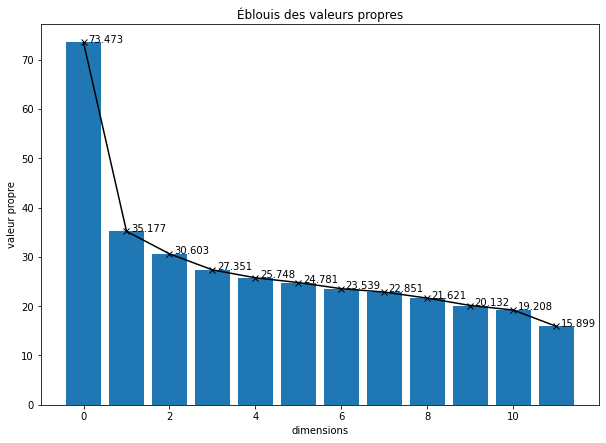

In [21]:
fig, ebl = plt.subplots(figsize = (10,7))

ebl.plot(range(p), s, marker= 'x', c='k')

ebl.bar(range(p),s[:])


for i,j in zip(range(p),np.around(s, decimals=3)):
    ebl.annotate(str(j),xy=(i+0.1,j+0.01))




ebl.set_ylabel('valeur propre')
ebl.set_xlabel('dimensions')
ebl.set_title('Éblouis des valeurs propres')
plt.show()

La consigne est ensuite de ne conserver que les vecteurs associés aux valeurs propres (ou singulières) placées avant le coude. 


### Règle de Kaiser-Guttman 

Une autre méthode peut-être obtenue avec les valeurs propres calculées à partir des valeurs singulières :

In [22]:
lambdas = (s**2)/(n-1)
lambdas_df = pd.DataFrame(lambdas).transpose()
lambdas_df.index = ['valeurs propres']
lambdas_df

,0,1,2,3,4,5,6,7,8,9,10,11
valeurs propres,5.328991,1.221514,0.924552,0.738455,0.654427,0.606208,0.546979,0.515447,0.46145,0.400078,0.364196,0.249549


Puisque l'ACP est normée, la somme des valeurs propres est égale au nombre de variables (aux erreurs d'arrondis près) :

In [23]:
sum(lambdas)

12.011846001974334

et leur moyenne vaut 1 :

In [24]:
lambdas.mean()

1.0009871668311943

De plus si les variables étaient deux à deux orthogonales (et donc les facteurs de corrélations identiques pour chaque variables deux à deux), les valeurs propres issues de l’analyse seraient toutes égales à 1 i.e. tous les facteurs seraient aussi importants les uns que les autres, chaque valeur propre exprimant $1/p =1/12$ de l'information.

Puisque ce n'est pas le cas, il paraît pertinent de ne considérer que les facteurs (ou axes) dont la valeur propre associée est supérieure à 1 ce qui, dans notre exemple, correspond aux deux premiers facteurs. 

### Tableau des valeurs propres et pourcentage de variance expliquée par chacune  

Enfin, on peut considérer une troisième méthode, souvent associée de façon complémentaire au graphe de l'éboulis mais qui nécessite le calcul des valeurs propres (alors que les valeurs singulières pouvaient être suffisantes pour l'éboulis). 
On s'intéresse ici aux pourcentages d'inertie expliquée par les axes associés aux valeurs propres. 



In [25]:
variance_percent = lambdas *100/p

cumulative_variance_percent = [ sum(variance_percent[:i]) for i in range(p+1)  ][1:]

tab_inertie = pd.DataFrame(np.array([lambdas, variance_percent, cumulative_variance_percent]), index=['valeurs propres',  'pourcentage variance', 'variance cumulées (en %)']).transpose()
tab_inertie = tab_inertie.round({'variance cumulées (en %)': 0, 'pourcentage variance' :0, 'valeurs propres':3})
tab_inertie.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
valeurs propres,5.329,1.222,0.925,0.738,0.654,0.606,0.547,0.515,0.461,0.4,0.364,0.25
pourcentage variance,44.000,10.000,8.000,6.000,5.000,5.000,5.000,4.000,4.000,3.0,3.000,2.00
variance cumulées (en %),44.000,55.000,62.000,68.000,74.000,79.000,84.000,88.000,92.000,95.0,98.000,100.00


Tout d'abord, on peut se rassurer en observant que nous n'avons pas perdu d'information : conserver les 12 axes, nous donne une variance cumulée de 100%. Nous n'avons donc pas fait n'importe quoi avec nos données !
En revanche, on remarque également que, en choisissant de ne conserver que deux axes, nous acceptons de perdre 45% de l'information... cela représente une perte importante pour l'analyse et cette dernière observation pourrait nous conduire à augmenter le nombre de facteurs retenus. 


Ainsi, l'analyse faite sur les 2 premiers facteurs n'est souvent qu'un début, et elle doit fréquemment être complétée par la prise en compte du troisième, du quatrième et jusqu'à un n-ième facteur (ici vraisemblablement jusqu'au cinquième ou sixième facteur, point d'inflexion de la courbe des variances cumulées).

----
----

# #3 Visualisations

Pour faciliter l'interprétation, pour restituer des résultats, pour communiquer avec le reste de la communauté scientifique ou avec un public plus large... représenter ces données et leur structure est une étape essentielle de l'analyse. L'importance des visualisations dans le processus de production de savoir (ou *d'objets techno-scientifiques* dans le vocabulaire Latourien) est soulignée par de nombreux auteurs (aussi bien par l'anthropolgue Bruno Latour, donc, que par des chercheurs plus spécialisés dans le secteur de la science des données commme Edward Tufte par exemple).   

Les tableaux des valeurs propres et de leur pourcentage de variance expliquée, par exemple, peuvent déjà être considérés comme de premières visualisations. Bien souvent, cependant, elles sont rangées parmi les représentations intermédiaires et sont complétées par des graphiques plus facilement appréhendables et interprétables.   



Nous ne programmerons ici que quelques unes des visualisations existantes pour l'ACP (les plus fréquemment mobilisées et celles qui sont disponibles sur R). Néanmoins, le lecteur pourra garder en tête que ses capacités de programmation sont la seule limite au champ des visualisations possibles (ce qui ne signifie certes pas pour autant que toute représentation graphique est pertinente). Libre à nous, donc, de faire preuve de créativité pour faire parler nos analyses.



## Qualité de représentation des variables
### Cercle de corrélation

Commençons par projeter nos variables sur nos axes principaux pour déterminer la qualité de notre représentation.
Puisque notre ACP est normée (nous avons centré et réduit nos variables), la distance des variables projetées à l’origine g est égale à 1 dans l'espace de dimension p.   
Par conséquent, les variables projetées seront dans le cercle de centre 0 (les variables ont été centrées sur le 0 de $R^p$) et de rayon 1. On appelle ce cercle le *cercle des corrélations*.   

Les variables sont d'autant mieux représentées par le plan de projection que leur image sur le cercle de corrélation est proche du bord du cercle. En effet, si le premier axe correspondait à la variable $Science$ par exemple, la norme de cette dernière serait de 1, comme dans l'espace en p dimensions.



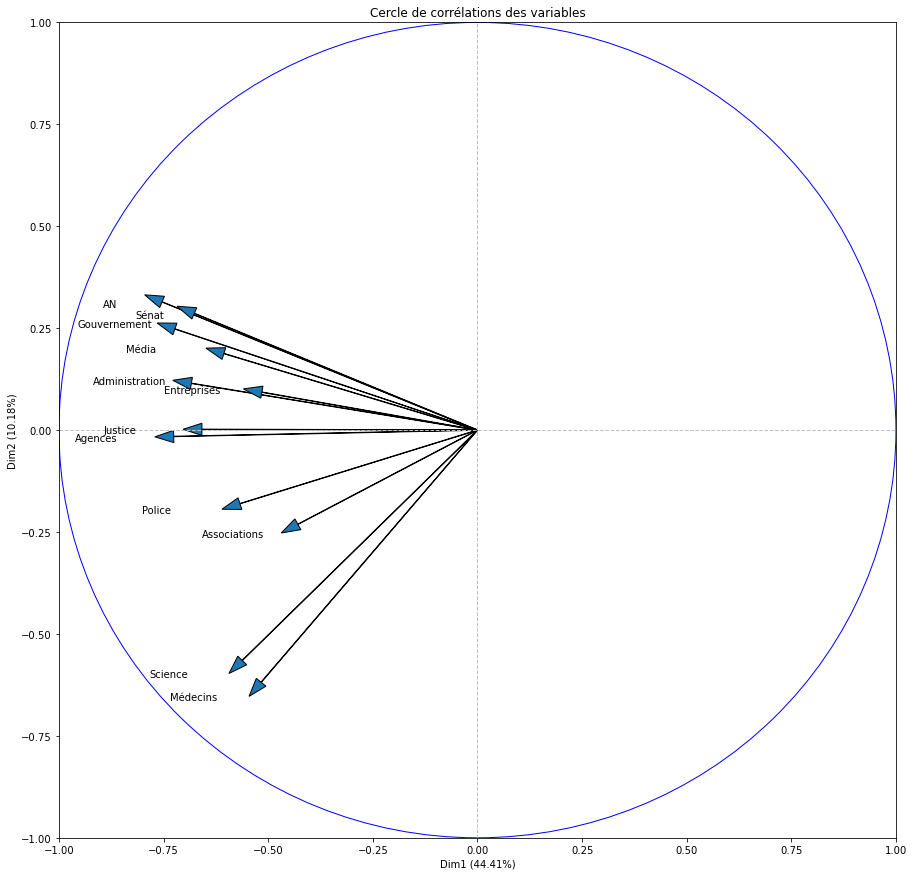

In [26]:
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = Vh[k,:] * np.sqrt(lambdas[k]) #corrélations variable-facteur


fig, axes = plt.subplots(figsize=(15,15)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1)



for j in range(p): 
    if df.columns[j] != "Sénat" and df.columns[j]!="AN": #nous avons construit cette boucle car nos légendes se superposaient, il s'agit donc d'un détail de présentation
        plt.annotate(df.columns[j],(corvar[j,0]- 0.19,corvar[j,1]-0.01))
    else :
        plt.annotate(df.columns[j],(corvar[j,0]- 0.1,corvar[j,1]-0.03)) 
    axes.arrow(0,
             0,  
             corvar[j,0],
             corvar[j,1],
             length_includes_head=True,
             head_width=0.03,
             head_length=1.5 * 0.03)


plt.axvline(color='silver',linestyle='--',linewidth=1)
plt.axhline(color='silver',linestyle='--',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)

axes.set_ylabel('Dim2 ({}%)'.format(np.around(variance_percent[1], decimals=2)))
axes.set_xlabel('Dim1 ({}%)'.format(np.around(variance_percent[0], decimals=2)))
axes.set_title('Cercle de corrélations des variables')



plt.show()

La qualité de représentation de chaque variable, étant donné nos nouveaux axes, peut également être appréciée par le calcul du carré des coordonnées des variables sur notre nouveau repère. On parle aussi du calcul des $cos^2$

### COS2

In [27]:
cos2var = corvar**2 
labels_cos= ['Cos'+'\u00B2'+' pour le facteur n°{}'.format(i+1) for i in range(p)]


COS2 = pd.DataFrame(cos2var)
COS2.index = df.columns
COS2.columns = labels_cos
COS2

,Cos² pour le facteur n°1,Cos² pour le facteur n°2,Cos² pour le facteur n°3,Cos² pour le facteur n°4,Cos² pour le facteur n°5,Cos² pour le facteur n°6,Cos² pour le facteur n°7,Cos² pour le facteur n°8,Cos² pour le facteur n°9,Cos² pour le facteur n°10,Cos² pour le facteur n°11,Cos² pour le facteur n°12
Justice,0.494780,0.000004,0.059635,0.036727,0.143383,0.013733,0.002610,0.027208,0.201780,0.017365,0.001705,0.002058
Média,0.420959,0.040447,0.029020,0.054774,0.003154,0.348649,0.067699,0.009756,0.020558,0.005679,0.000182,0.000110
Police,0.372592,0.037665,0.161311,0.008579,0.242693,0.035298,0.046538,0.073043,0.009490,0.011159,0.001323,0.001298
AN,0.632232,0.110054,0.000878,0.010177,0.049238,0.007948,0.013752,0.000013,0.008982,0.005887,0.015566,0.146260
Science,0.352540,0.356381,0.005971,0.000297,0.058987,0.010086,0.004242,0.005667,0.032799,0.159523,0.014413,0.000082
Administration,0.529931,0.014920,0.015488,0.009029,0.034787,0.007602,0.027033,0.208030,0.138008,0.011659,0.004438,0.000063
Entreprises,0.312968,0.010212,0.104103,0.495955,0.002504,0.009585,0.039746,0.007402,0.013712,0.003486,0.001311,0.000002
Associations,0.219683,0.063683,0.491145,0.066933,0.000007,0.105694,0.008992,0.034968,0.002606,0.000599,0.006155,0.000521
Gouvernement,0.585913,0.069023,0.013106,0.025030,0.021123,0.001070,0.054042,0.052331,0.000603,0.013967,0.115275,0.049503
Agences,0.594120,0.000275,0.004243,0.023493,0.006618,0.000900,0.134558,0.067388,0.009038,0.001061,0.156182,0.003112


Cette représentation sous forme de tableau peut, je vous l'accorde, ne pas être très parlante. Plusieurs visualisations ont été crée pour faciliter l'interprétation des $cos^2$. Parmi elles, on trouve la *heat map*,  qui fera correspondre la qualité de représentation d'une variable (donnée par son $cos^2$) à un nuancier de couleurs.

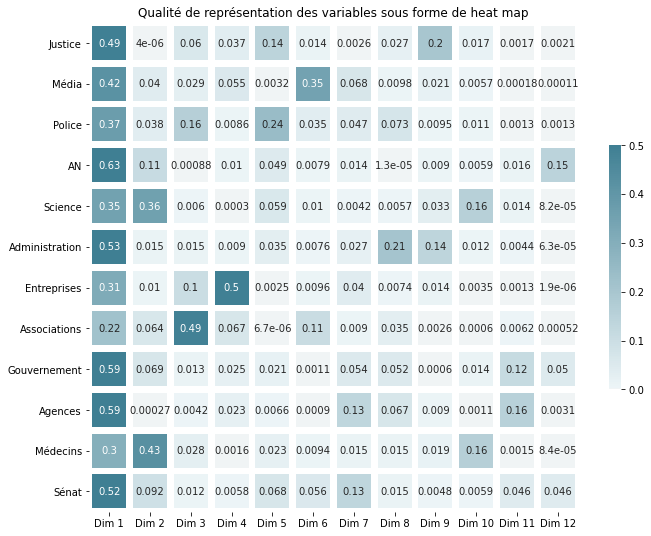

In [28]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(280, 220,sep = 1, as_cmap=True)


sns.heatmap(COS2, annot=True, xticklabels = ['Dim %d' %i for i in range (1, p+1)], cmap=cmap, vmin=0, vmax=.5, center=0,
            square=True, linewidths=5.75, cbar_kws={"shrink": .5})

ax.set_title('Qualité de représentation des variables sous forme de heat map')


plt.show()

On remarque que le premier facteur principal représente bien mieux la variable $Assemblée\ Nationale$, par exemple, que la variable $Association$, qui est relativement mal représentée par les deux premiers facteurs que nous avons conservés. 
Il faudra donc faire d'autant plus attention de ne pas sur-interpréter les résultats obtenus pour cette variable car nous avons perdu plus de 70\% de l'information la concernant.



---
Intéressons nous désormais au plan principal, c'est-à-dire à la projection de nos 1014 sondés sur les deux premiers facteurs.

## Graphique des individus 

Projetons nos données sur les axes principaux à l'aide des résultats obtenus par la décomposition en valeurs singulières :

In [29]:
projected_data = np.dot(U, np.diag(s))
projected_data = pd.DataFrame(projected_data)
projected_data.columns = ['facteur %d' %i for i in range (1, p+1)]

projected_data

,facteur 1,facteur 2,facteur 3,facteur 4,facteur 5,facteur 6,facteur 7,facteur 8,facteur 9,facteur 10,facteur 11,facteur 12
0,2.281890,-0.155856,-0.551834,0.071380,-0.920435,-1.797664,-0.957618,0.596855,-0.681430,-0.802836,-0.427317,-0.173642
1,0.099399,-1.591365,0.218228,0.221532,0.113526,0.354529,-0.072186,-0.082999,0.048907,-0.110956,0.061195,0.022058
2,2.107186,-0.115385,0.931742,1.208869,0.854475,0.277843,0.575530,0.214574,-0.611257,1.188751,-0.043648,0.158747
3,-2.181264,1.149457,0.857605,0.280502,-0.541816,-0.429067,-0.044653,0.340934,0.152969,-0.095782,0.201341,0.350311
4,-2.847628,-0.633244,-1.444994,-0.224300,1.299886,-0.907456,1.263755,-0.324375,-1.121020,1.237303,0.122700,-0.455821
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.443483,0.384546,-0.359598,0.252017,0.799707,-0.653427,-0.203683,-0.251924,-1.100816,-0.290002,-1.480630,0.540588
1010,-0.069955,-2.377972,-0.065357,0.928757,0.287628,-1.325017,-0.463021,-1.754673,-0.068275,-0.226755,0.640612,1.142323
1011,0.042115,0.381024,1.215105,0.322783,-0.160286,-0.024210,-0.507293,0.770537,0.659114,-0.019649,1.423116,0.046968
1012,-1.329118,0.861023,1.946941,-1.036741,-0.745164,0.069297,-0.803535,0.329622,1.035708,0.299186,1.156881,-0.251054


Malgré une perte significative d'information, nous avons choisi de ne conserver que les deux premiers facteurs. Dans une analyse approfondie de nos données (ce qui sort du cadre de ce document) le nuage de point ci-dessous  serait à combiner avec le graphique des individus ayant le troisième et le quatrième facteur principal comme axes.



In [30]:
output_notebook()


source = ColumnDataSource(
         data=dict(
            x=projected_data.iloc[:,0],
            y=projected_data.iloc[:,1],         
         ))


hover = HoverTool(
        tooltips=[
            ("Numéro de l'individu", "$index"),
            ("Coordonnées de l'individu projeté", "($x, $y)"),  
        ], names = ['dots'])

fig = figure(plot_width=600, 
             plot_height=400, 
             title= 'Nuage des individus',
             tools = "pan, wheel_zoom, box_zoom, reset")

fig.add_tools(hover)
fig.xaxis.axis_label = 'Dim 1'
fig.yaxis.axis_label = 'Dim 2'


fig.circle(projected_data.iloc[:,0], projected_data.iloc[:,1], size=3, alpha=0.6, name = 'dots', hover_color='orange')

show(fig)

Loading BokehJS ...

Jetons un oeil aux points les plus extrêmes. Grâce à l'interactivité, nous pouvons obtenir l'index des individus situés le plus à gauche en passant notre souris sur le point correspondant. Il s'agit des individus qui ont répondu de la même façon que l'individu 47. Observons ses réponses :


In [31]:
pd.DataFrame(df.loc[47]).T

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
47,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


L'individu 47 se distingue par la grande confiance qu'il accorde à toutes les institutions ! Qu'en est-il du profil situé à l'extrême droite ? 

In [32]:
pd.DataFrame(df.loc[292]).T

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
292,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Son profil de réponse est caractérisé par une défiance généralisée.  
De fait, le premier axe principal, situé en abscisse, distingue les profils *confiants* (ici à gauche) des profils *défiants* (à droite). 

Qu'en est-il du second axe ?   
Nous avons vu grâce au cercle des corrélations que le deuxième facteur principal opposait un groupe qui a exprimé sa confiance dans l'Assemblée Nationale, le Sénat et le gouvernement, à un autre groupe qui accorde davantage sa confiance aux médecins et à la science.   
Cette analyse est elle confirmée par l'observation des individus qui sont sur un même axe vertical mais à l'opposé l'un de l'autre ?   
Plaçons nous sur l'axe des ordonnées, à la verticale de l'origine du repère, et observons l'individu situé le plus en hauteur (avec la plus grande ordonnée). Le curseur nous indique que nous observons l'individu 451 dont les réponses au sondage furent :

In [33]:
pd.DataFrame(df.loc[451]).T

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
451,2.0,5.0,1.0,5.0,1.0,2.0,5.0,2.0,5.0,2.0,1.0,5.0


Sénat, Assemblée Nationale et gouvernement se sont vus descerner une note de confiance de 5/5 par ce sondé. En revanche, ce même individu a attribué 1/5 à la Science et aux Médecins.   
   
Voyons désormais le pendant de cet individu, le point proche de l'axe x=0 avec la plus petite ordonnée :

In [34]:
pd.DataFrame(df.loc[321]).T

,Justice,Média,Police,AN,Science,Administration,Entreprises,Associations,Gouvernement,Agences,Médecins,Sénat
321,2.0,2.0,5.0,2.0,5.0,1.0,2.0,5.0,2.0,4.0,4.0,4.0


Si le Sénat obtient la note de 4/5, l'Assemblée nationale et le gouvernement sont mal notés tandis que Science et médecins ont les notes respectives 5/5 et 4/5.


Ainsi, grâce à ce nuage projeté des individus et à nos analyses, nous pouvons désormais effectuer des classifications et tester leur robustesse.   
Faisons par exemple apparaître deux groupes en fonction de la note de confiance attribuée à la science :


In [35]:
output_notebook()

couleurs =[]
for note in df['Science']:
    if note > 3:
        couleurs.append('red')
    else :
        couleurs.append('black')



source = ColumnDataSource(
         data=dict(
            x=projected_data.iloc[:,0],
            y=projected_data.iloc[:,1],    
            groupes_science = couleurs,
         ))


hover = HoverTool(
        tooltips=[
            ("Numéro de l'individu", "$index"),
            ("Coordonnées de l'individu projeté", "($x, $y)"),  
        ], names = ['dots'])

fig = figure(plot_width=600, 
             plot_height=400, 
             title= 'Nuage des individus',
             tools = "pan, wheel_zoom, box_zoom, reset")

fig.add_tools(hover)
fig.xaxis.axis_label = 'Dim 1'
fig.yaxis.axis_label = 'Dim 2'


fig.circle('x', 'y', color='groupes_science', source=source, size=3, alpha=1, name = 'dots', hover_color='orange')

show(fig)


Loading BokehJS ...

Nous observons que les notes de confiance supérieures à la moyenne en sciences (en rouge) sont plutôt situées dans le quart bas gauche : la confiance dans la science va souvent de paire avec une moyenne de notes plutôt haute.   


Tailles, formes, transparences et couleurs des points peuvent ainsi être modifiées pour mettre en valeur des groupes et vérifier des interprétations :


In [36]:
output_notebook()

couleurs =[]
for note in df['Science']:
    if note > 3:
        couleurs.append('red')
    elif note == 3:
        couleurs.append('blue')
    else :
        couleurs.append('black')


sizes =[]
for note in df['Gouvernement']:
    if note < 3:
        sizes.append(4)
    else :
        sizes.append(2)



source = ColumnDataSource(
         data=dict(
            x=projected_data.iloc[:,0],
            y=projected_data.iloc[:,1],    
            groupes = couleurs,
            groupes2 = sizes,
         ))


hover = HoverTool(
        tooltips=[
            ("Numéro de l'individu", "$index"),
            ("Coordonnées de l'individu projeté", "($x, $y)"),  
        ], names = ['dots'])

fig = figure(plot_width=600, 
             plot_height=400, 
             title= 'Nuage des individus',
             tools = "pan, wheel_zoom, box_zoom, reset")

fig.add_tools(hover)
fig.xaxis.axis_label = 'Dim 1'
fig.yaxis.axis_label = 'Dim 2'


fig.circle('x', 'y', color='groupes', source=source, size='groupes2', alpha=1, name = 'dots', hover_color='orange')

show(fig)



Loading BokehJS ...

Nombreuses sont encore les visualisations que nous pourrions afficher ou/et inventer pour faire parler notre ACP. 
Néanmoins, notre ambition n'a jamais été l'exhaustivité.   
En revanche, nous souhaitions démontrer les potentialités offertes par Python en reproduisant et en complétant certaines fonctionnalités existantes sur R.  
La possibilité de créer un nuage des individus interactif, indisponible sur R (qui ne dispose d'aucune bibliothèque similaire à bokeh), vous aura peut-être convaincus des avantages et de l'accessibilité de Python pour l'analyse des données en sciences humaines et sociales. 


La communauté Python s'agrandit de jours en jours et les usages de ce langage sont loin de se limiter à la science des données. 
Qui sait, peut-être tomberez-vous bientôt sur un ouvrage de python pour les sciences humaines et sociales qui vous mettra définitivement la main à la patte.  
En attendant, merci de votre lecture :)